In [ ]:
!rm -r sample_data
!gdown 1q1Kg0Abku3UE4lDEmqnUHNv2HCPTKAv2
!unzip CSVs.zip
!rm -r CSVs.zip

Downloading...
From (original): https://drive.google.com/uc?id=1q1Kg0Abku3UE4lDEmqnUHNv2HCPTKAv2
From (redirected): https://drive.google.com/uc?id=1q1Kg0Abku3UE4lDEmqnUHNv2HCPTKAv2&confirm=t&uuid=71bf3b9b-823e-4e4a-8730-042353421718
To: /content/CSVs.zip
100% 231M/231M [00:04<00:00, 54.3MB/s]
Archive:  CSVs.zip
   creating: CSVs/
  inflating: CSVs/Friday-WorkingHours-Afternoon-DDos.pcap_ISCX.csv  
  inflating: CSVs/Friday-WorkingHours-Afternoon-PortScan.pcap_ISCX.csv  
  inflating: CSVs/Friday-WorkingHours-Morning.pcap_ISCX.csv  
  inflating: CSVs/Monday-WorkingHours.pcap_ISCX.csv  
  inflating: CSVs/Thursday-WorkingHours-Afternoon-Infilteration.pcap_ISCX.csv  
  inflating: CSVs/Thursday-WorkingHours-Morning-WebAttacks.pcap_ISCX.csv  
  inflating: CSVs/Tuesday-WorkingHours.pcap_ISCX.csv  
  inflating: CSVs/Wednesday-workingHours.pcap_ISCX.csv  


In [ ]:
import pandas as pd
import os
from sklearn import preprocessing
import time
import numpy as np # linear algebra
import matplotlib
import seaborn as sns
import sklearn
import imblearn
import matplotlib.pyplot as plt
import sklearn.metrics as m
import xgboost as xgb

In [ ]:
# DARPA 98
# KDD 99
# CAIDA
# NSL-KDD
# ISCX 2012
# CICIDS2017

In [ ]:
seconds = time.time()
get_ipython().run_line_magic('matplotlib', 'inline')

# CSV files names:
csv_files=["Monday-WorkingHours.pcap_ISCX",
        "Tuesday-WorkingHours.pcap_ISCX",
        "Wednesday-workingHours.pcap_ISCX",
        "Thursday-WorkingHours-Morning-WebAttacks.pcap_ISCX",
        "Thursday-WorkingHours-Afternoon-Infilteration.pcap_ISCX",
        "Friday-WorkingHours-Morning.pcap_ISCX",
        "Friday-WorkingHours-Afternoon-PortScan.pcap_ISCX",
        "Friday-WorkingHours-Afternoon-DDos.pcap_ISCX",]


In [ ]:
#df.columns.values.tolist()
main_labels = [' Destination Port', ' Flow Duration', ' Total Fwd Packets',
       ' Total Backward Packets', 'Total Length of Fwd Packets',
       ' Total Length of Bwd Packets', ' Fwd Packet Length Max',
       ' Fwd Packet Length Min', ' Fwd Packet Length Mean',
       ' Fwd Packet Length Std', 'Bwd Packet Length Max',
       ' Bwd Packet Length Min', ' Bwd Packet Length Mean',
       ' Bwd Packet Length Std', 'Flow Bytes/s', ' Flow Packets/s',
       ' Flow IAT Mean', ' Flow IAT Std', ' Flow IAT Max', ' Flow IAT Min',
       'Fwd IAT Total', ' Fwd IAT Mean', ' Fwd IAT Std', ' Fwd IAT Max',
       ' Fwd IAT Min', 'Bwd IAT Total', ' Bwd IAT Mean', ' Bwd IAT Std',
       ' Bwd IAT Max', ' Bwd IAT Min', 'Fwd PSH Flags', ' Bwd PSH Flags',
       ' Fwd URG Flags', ' Bwd URG Flags', ' Fwd Header Length',
       ' Bwd Header Length', 'Fwd Packets/s', ' Bwd Packets/s',
       ' Min Packet Length', ' Max Packet Length', ' Packet Length Mean',
       ' Packet Length Std', ' Packet Length Variance', 'FIN Flag Count',
       ' SYN Flag Count', ' RST Flag Count', ' PSH Flag Count',
       ' ACK Flag Count', ' URG Flag Count', ' CWE Flag Count',
       ' ECE Flag Count', ' Down/Up Ratio', ' Average Packet Size',
       ' Avg Fwd Segment Size', ' Avg Bwd Segment Size',
       ' Fwd Header Length.1', 'Fwd Avg Bytes/Bulk', ' Fwd Avg Packets/Bulk',
       ' Fwd Avg Bulk Rate', ' Bwd Avg Bytes/Bulk', ' Bwd Avg Packets/Bulk',
       'Bwd Avg Bulk Rate', 'Subflow Fwd Packets', ' Subflow Fwd Bytes',
       ' Subflow Bwd Packets', ' Subflow Bwd Bytes', 'Init_Win_bytes_forward',
       ' Init_Win_bytes_backward', ' act_data_pkt_fwd',
       ' min_seg_size_forward', 'Active Mean', ' Active Std', ' Active Max',
       ' Active Min', 'Idle Mean', ' Idle Std', ' Idle Max', ' Idle Min', ' Label']

cols = main_labels
# main_labels2 = main_labels

# main_labels = (",".join( i for i in main_labels ))
# main_labels = main_labels+"\n"


In [ ]:
df3 = pd.read_csv('CSVs/'+str(csv_files[3])+'.csv')
df3.head()

Destination Port   Flow Duration   Total Fwd Packets  \
0                389       113095465                  48   
1                389       113473706                  68   
2                  0       119945515                 150   
3                443        60261928                   9   
4                 53             269                   2   

    Total Backward Packets  Total Length of Fwd Packets  \
0                       24                         9668   
1                       40                        11364   
2                        0                            0   
3                        7                         2330   
4                        2                          102   

    Total Length of Bwd Packets   Fwd Packet Length Max  \
0                         10012                     403   
1                         12718                     403   
2                             0                       0   
3                          4221                    1093   
4                           322                      51   

    Fwd Packet Length Min   Fwd Packet Length Mean   Fwd Packet Length Std  \
0                       0               201.416667              203.548293   
1                       0               167.117647              171.919413   
2                       0                 0.000000                0.000000   
3                       0               258.888889              409.702161   
4                      51                51.000000                0.000000   

   ...   min_seg_size_forward  Active Mean    Active Std   Active Max  \
0  ...                     32   203985.500  5.758373e+05      1629110   
1  ...                     32   178326.875  5.034269e+05      1424245   
2  ...                      0  6909777.333  1.170000e+07     20400000   
3  ...                     20        0.000  0.000000e+00            0   
4  ...                     32        0.000  0.000000e+00            0   

    Active Min   Idle Mean      Idle Std   Idle Max   Idle Min   Label  
0          379  13800000.0  4.277541e+06   16500000    6737603  BENIGN  
1          325  13800000.0  4.229413e+06   16500000    6945512  BENIGN  
2            6  24400000.0  2.430000e+07   60100000    5702188  BENIGN  
3            0         0.0  0.000000e+00          0          0  BENIGN  
4            0         0.0  0.000000e+00          0          0  BENIGN  

[5 rows x 79 columns]

In [ ]:
mon = pd.read_csv("CSVs/Monday-WorkingHours.pcap_ISCX.csv", encoding="utf-8")
tues = pd.read_csv("CSVs/Tuesday-WorkingHours.pcap_ISCX.csv", encoding="utf-8")
wed = pd.read_csv("CSVs/Wednesday-workingHours.pcap_ISCX.csv", encoding="utf-8")
thur_web = pd.read_csv("CSVs/Thursday-WorkingHours-Morning-WebAttacks.pcap_ISCX.csv", encoding="utf-8")
thur_inf = pd.read_csv("CSVs/Thursday-WorkingHours-Afternoon-Infilteration.pcap_ISCX.csv", encoding="utf-8")
frid_ddos = pd.read_csv("CSVs/Friday-WorkingHours-Afternoon-DDos.pcap_ISCX.csv", encoding="utf-8")
frid_port = pd.read_csv("CSVs/Friday-WorkingHours-Afternoon-PortScan.pcap_ISCX.csv", encoding="utf-8")
frid_morn = pd.read_csv("CSVs/Friday-WorkingHours-Morning.pcap_ISCX.csv", encoding="utf-8")

In [ ]:
### NA values are minority of the dataset. Because they cannot be processed by algorithms, they can be easily discarded
mon = mon.dropna()
tues = tues.dropna()
wed = wed.dropna()
thur_web = thur_web.dropna()
thur_inf = thur_inf.dropna()
frid_ddos = frid_ddos.dropna()
frid_port = frid_port.dropna()
frid_morn = frid_morn.dropna()

In [ ]:
all_data = pd.concat([mon, tues, wed, thur_web, thur_inf, frid_ddos, frid_port, frid_morn], ignore_index=True)

del mon, tues, wed, thur_web, thur_inf, frid_ddos, frid_port, frid_morn

all_data.to_csv('all_data.csv')

In [ ]:
all_data = pd.read_csv('all_data.csv')

In [ ]:
pd.set_option('display.max_columns', None)

describe_info = all_data.describe()
describe_info

Unnamed: 0   Destination Port   Flow Duration   Total Fwd Packets  \
count  2.829385e+06       2.829385e+06    2.829385e+06        2.829385e+06   
mean   1.414692e+06       8.071249e+03    1.479276e+07        9.364763e+00   
std    8.167732e+05       1.828343e+04    3.366026e+07        7.498527e+02   
min    0.000000e+00       0.000000e+00   -1.300000e+01        1.000000e+00   
25%    7.073460e+05       5.300000e+01    1.550000e+02        2.000000e+00   
50%    1.414692e+06       8.000000e+01    3.132700e+04        2.000000e+00   
75%    2.122038e+06       4.430000e+02    3.221416e+06        5.000000e+00   
max    2.829384e+06       6.553500e+04    1.200000e+08        2.197590e+05   

        Total Backward Packets  Total Length of Fwd Packets  \
count             2.829385e+06                 2.829385e+06   
mean              1.039869e+01                 5.495661e+02   
std               9.976276e+02                 9.995980e+03   
min               0.000000e+00                 0.000000e+00   
25%               1.000000e+00                 1.200000e+01   
50%               2.000000e+00                 6.200000e+01   
75%               4.000000e+00                 1.870000e+02   
max               2.919220e+05                 1.290000e+07   

        Total Length of Bwd Packets   Fwd Packet Length Max  \
count                  2.829385e+06            2.829385e+06   
mean                   1.617040e+04            2.076996e+02   
std                    2.263631e+06            7.173425e+02   
min                    0.000000e+00            0.000000e+00   
25%                    2.000000e+00            6.000000e+00   
50%                    1.230000e+02            3.700000e+01   
75%                    4.820000e+02            8.100000e+01   
max                    6.554530e+08            2.482000e+04   

        Fwd Packet Length Min   Fwd Packet Length Mean  \
count            2.829385e+06             2.829385e+06   
mean             1.872264e+01             5.822987e+01   
std              6.035243e+01             1.861314e+02   
min              0.000000e+00             0.000000e+00   
25%              0.000000e+00             6.000000e+00   
50%              2.000000e+00             3.400000e+01   
75%              3.600000e+01             5.000000e+01   
max              2.325000e+03             5.940857e+03   

        Fwd Packet Length Std  Bwd Packet Length Max   Bwd Packet Length Min  \
count            2.829385e+06           2.829385e+06            2.829385e+06   
mean             6.894321e+01           8.712674e+02            4.106928e+01   
std              2.812505e+02           1.946741e+03            6.887325e+01   
min              0.000000e+00           0.000000e+00            0.000000e+00   
25%              0.000000e+00           2.000000e+00            0.000000e+00   
50%              0.000000e+00           7.900000e+01            0.000000e+00   
75%              2.616295e+01           2.810000e+02            7.700000e+01   
max              7.125597e+03           1.953000e+04            2.896000e+03   

        Bwd Packet Length Mean   Bwd Packet Length Std  Flow Bytes/s  \
count             2.829385e+06            2.829385e+06  2.829385e+06   
mean              3.060961e+02            3.354867e+02           inf   
std               6.053649e+02            8.398626e+02           NaN   
min               0.000000e+00            0.000000e+00 -2.610000e+08   
25%               1.750000e+00            0.000000e+00  1.193197e+02   
50%               7.200000e+01            0.000000e+00  4.595549e+03   
75%               1.810000e+02            7.800000e+01  1.666667e+05   
max               5.800500e+03            8.194660e+03           inf   

        Flow Packets/s   Flow IAT Mean   Flow IAT Std   Flow IAT Max  \
count     2.829385e+06    2.829385e+06   2.829385e+06   2.829385e+06   
mean               inf    1.299072e+06   2.920672e+06   9.186883e+06   
std                NaN    4.508936e+06   8.047546e+06   2.446

In [ ]:
# if all info = 0, remove that columns
# return True if all info = 0
zero_cols = (describe_info.iloc[1:, :] == 0).all()

all_zeroes_cols = describe_info.loc[:, zero_cols]
del zero_cols

all_zeroes_cols # in df

Bwd PSH Flags   Bwd URG Flags  Fwd Avg Bytes/Bulk  \
count       2829385.0       2829385.0           2829385.0   
mean              0.0             0.0                 0.0   
std               0.0             0.0                 0.0   
min               0.0             0.0                 0.0   
25%               0.0             0.0                 0.0   
50%               0.0             0.0                 0.0   
75%               0.0             0.0                 0.0   
max               0.0             0.0                 0.0   

        Fwd Avg Packets/Bulk   Fwd Avg Bulk Rate   Bwd Avg Bytes/Bulk  \
count              2829385.0           2829385.0            2829385.0   
mean                     0.0                 0.0                  0.0   
std                      0.0                 0.0                  0.0   
min                      0.0                 0.0                  0.0   
25%                      0.0                 0.0                  0.0   
50%                      0.0                 0.0                  0.0   
75%                      0.0                 0.0                  0.0   
max                      0.0                 0.0                  0.0   

        Bwd Avg Packets/Bulk  Bwd Avg Bulk Rate  
count              2829385.0          2829385.0  
mean                     0.0                0.0  
std                      0.0                0.0  
min                      0.0                0.0  
25%                      0.0                0.0  
50%                      0.0                0.0  
75%                      0.0                0.0  
max                      0.0                0.0

In [ ]:
## removing [8] features from previous cell - they are reduntant
all_data.drop(columns=all_zeroes_cols, inplace=True)
all_data.shape

(2829385, 72)

In [ ]:
#rename some labels to readable format
all_data.loc[:," Label"].replace({"Web Attack � XSS" : "XSS",
                                  "Web Attack � Sql Injection": "Sql Injection",
                                  "Web Attack � Brute Force": "Brute Force"}, inplace=True)

print(all_data.loc[:," Label"].unique())

['BENIGN' 'FTP-Patator' 'SSH-Patator' 'DoS slowloris' 'DoS Slowhttptest'
 'DoS Hulk' 'DoS GoldenEye' 'Heartbleed' 'Brute Force' 'XSS'
 'Sql Injection' 'Infiltration' 'DDoS' 'PortScan' 'Bot']


In [ ]:
## remove trailing && leading spaces from all the labels
rename_cols = lambda col_lbl: col_lbl.strip()
all_data.rename(rename_cols, axis=1, inplace=True, errors="raise")

In [ ]:
## temporarily add new column to distinguish traffic type between Normal / Attack
trf_type = all_data.loc[:, "Label"].map(lambda lbl: "Normal" if lbl == "BENIGN" else "Attack")
trf_type.name = "traffic type"
all_data.loc[:, trf_type.name] = trf_type
del trf_type

In [ ]:
all_data

Destination Port  Flow Duration  Total Fwd Packets  \
0                   49188              4                  2   
1                   49188              1                  2   
2                   49188              1                  2   
3                   49188              1                  2   
4                   49486              3                  2   
...                   ...            ...                ...   
2829380                53          61452                  4   
2829381                53            171                  2   
2829382                53            222                  2   
2829383               123          16842                  1   
2829384                53            153                  2   

         Total Backward Packets  Total Length of Fwd Packets  \
0                             0                           12   
1                             0                           12   
2                             0                           12   
3                             0                           12   
4                             0                           12   
...                         ...                          ...   
2829380                       2                          180   
2829381                       2                           80   
2829382                       2                           90   
2829383                       1                           48   
2829384                       2                           68   

         Total Length of Bwd Packets  Fwd Packet Length Max  \
0                                  0                      6   
1                                  0                      6   
2                                  0                      6   
3                                  0                      6   
4                                  0                      6   
...                              ...                    ...   
2829380                          354                     45   
2829381                          272                     40   
2829382                          354                     45   
2829383                           48                     48   
2829384                          100                     34   

         Fwd Packet Length Min  Fwd Packet Length Mean  Fwd Packet Length Std  \
0                            6                     6.0                    0.0   
1                            6                     6.0                    0.0   
2                            6                     6.0                    0.0   
3                            6                     6.0                    0.0   
4                            6                     6.0                    0.0   
...                        ...                     ...                    ...   
2829380                     45                    45.0                    0.0   
2829381                     40                    40.0                    0.0   
2829382                     45                    45.0                    0.0   
2829383                     48                    48.0                    0.0   
2829384                     34                    34.0                    0.0   

         Bwd Packet Length Max  Bwd Packet Length Min  Bwd Packet Length Mean  \
0                            0                      0                     0.0   
1                            0                      0                     0.0   
2                            0                      0                     0.0   
3                            0                      0                     0.0   
4                            0                      0                     0.0   
...                        ...                    ...                     ...   
2829380                    177                    177                   177.0   
2829381                    136                    136                   136.0   
2829382                 

In [ ]:
label_cols = all_data[['Label','traffic type']]
all_data = all_data.drop(['Label', 'traffic type'], axis=1)


for i in all_data.columns:
    c = np.isinf(all_data[i]).values.sum()
    if c > 0:
        print(str(i) + " contains " + str(c) + " infinite values")
else:
    print('No infinite values')

for i in all_data.columns:
    c = np.isnan(all_data[i]).values.sum()
    if c > 0:
        print(str(i) + " contains " + str(c) + " NA values")
else:
  print('No more NA values')

all_data = pd.concat([all_data, label_cols], axis=1)

Flow Bytes/s contains 1509 infinite values
Flow Packets/s contains 1509 infinite values
No infinite values
No more NA values


In [ ]:
#convert all inf values to NaN value and remove it
all_data.replace([np.inf, -np.inf], np.nan, inplace=True)
all_data.dropna(inplace=True)

In [ ]:
label_cols["traffic type"].value_counts()

Normal    2272688
Attack     556697
Name: traffic type, dtype: int64

In [ ]:
all_data.head()

Unnamed: 0  Destination Port  Flow Duration  Total Fwd Packets  \
0           0             49188              4                  2   
1           1             49188              1                  2   
2           2             49188              1                  2   
3           3             49188              1                  2   
4           4             49486              3                  2   

   Total Backward Packets  Total Length of Fwd Packets  \
0                       0                           12   
1                       0                           12   
2                       0                           12   
3                       0                           12   
4                       0                           12   

   Total Length of Bwd Packets  Fwd Packet Length Max  Fwd Packet Length Min  \
0                            0                      6                      6   
1                            0                      6                      6   
2                            0                      6                      6   
3                            0                      6                      6   
4                            0                      6                      6   

   Fwd Packet Length Mean  Fwd Packet Length Std  Bwd Packet Length Max  \
0                     6.0                    0.0                      0   
1                     6.0                    0.0                      0   
2                     6.0                    0.0                      0   
3                     6.0                    0.0                      0   
4                     6.0                    0.0                      0   

   Bwd Packet Length Min  Bwd Packet Length Mean  Bwd Packet Length Std  \
0                      0                     0.0                    0.0   
1                      0                     0.0                    0.0   
2                      0                     0.0                    0.0   
3                      0                     0.0                    0.0   
4                      0                     0.0                    0.0   

   Flow Bytes/s  Flow Packets/s  Flow IAT Mean  Flow IAT Std  Flow IAT Max  \
0     3000000.0    5.000000e+05            4.0           0.0             4   
1    12000000.0    2.000000e+06            1.0           0.0             1   
2    12000000.0    2.000000e+06            1.0           0.0             1   
3    12000000.0    2.000000e+06            1.0           0.0             1   
4     4000000.0    6.666667e+05            3.0           0.0             3   

   Flow IAT Min  Fwd IAT Total  Fwd IAT Mean  Fwd IAT Std  Fwd IAT Max  \
0             4              4           4.0          0.0            4   
1             1              1           1.0          0.0            1   
2             1              1           1.0          0.0            1   
3             1              1           1.0          0.0            1   
4             3              3           3.0          0.0            3   

   Fwd IAT Min  Bwd IAT Total  Bwd IAT Mean  Bwd IAT Std  Bwd IAT Max  \
0            4              0           0.0          0.0            0   
1            1              0           0.0          0.0            0   
2            1              0           0.0          0.0            0   
3            1              0           0.0          0.0            0   
4            3              0           0.0          0.0            0   

   Bwd IAT Min  Fwd PSH Flags  Fwd URG Flags  Fwd Header Length  \
0            0              0              0                 40   
1            0              0              0                 40   
2            0              0              0                 40   
3            0              0              0                 40   
4            0              0              0                 40   

   Bwd Header Length  Fwd Packets/s  Bwd Packets/s  Min Packet Length  \
0                  0   5.00

Normal    2271320
Attack     556556
Name: traffic type, dtype: int64


<Axes: ylabel='Type'>

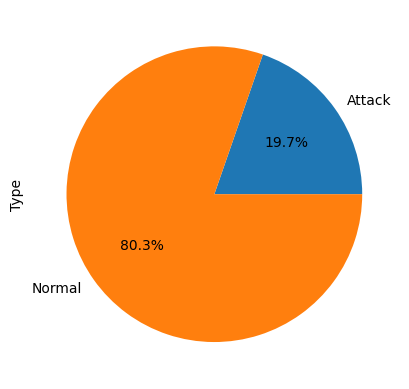

In [ ]:
print(all_data["traffic type"].value_counts())

all_data.groupby('traffic type').size().plot(kind='pie',
                                       y = "traffic type",
                                       label = "Type",
                                       autopct='%1.1f%%')

In [ ]:
normal_type = all_data[all_data["traffic type"] == "Normal"]
attack_type  = all_data[all_data["traffic type"] == "Attack"]

print(normal_type.shape)
print(attack_type.shape)

(2271320, 73)
(556556, 73)


In [ ]:
from sklearn.utils import resample

normal_downsample = resample(normal_type,
             replace=True,
             n_samples=len(attack_type),
             random_state=42)

print(normal_downsample.shape)

(556556, 73)


Normal    556556
Attack    556556
Name: traffic type, dtype: int64


<Axes: ylabel='Type'>

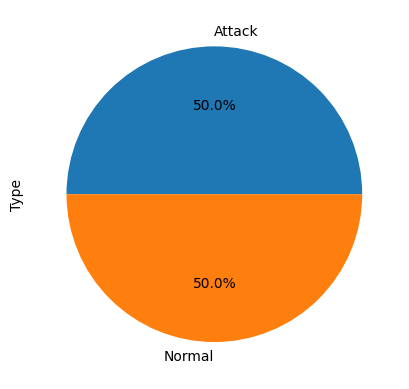

In [ ]:
data_downsampled = pd.concat([normal_downsample, attack_type])

print(data_downsampled["traffic type"].value_counts())

data_downsampled.groupby('traffic type').size().plot(kind='pie',
                                       y = "traffic type",
                                       label = "Type",
                                       autopct='%1.1f%%')

In [ ]:
data_downsampled.dropna(inplace=True)
data_downsampled.to_csv('data_downsampled_checkpoint_1.csv')

del normal_type, attack_type, normal_downsample, all_data

data_downsampled.shape

In [ ]:
#download check_point_1 to continue if progress lost
!gdown 1R3VDGYzHM7s42LiuwFgEGe0pxkCSD7OD

!unzip data_downsampled_checkpoint_1.zip
!rm -r data_downsampled_checkpoint_1.zip

Downloading...
From (original): https://drive.google.com/uc?id=1R3VDGYzHM7s42LiuwFgEGe0pxkCSD7OD
From (redirected): https://drive.google.com/uc?id=1R3VDGYzHM7s42LiuwFgEGe0pxkCSD7OD&confirm=t&uuid=7526e0f8-aac6-4c81-b187-cac986c12e8d
To: /content/data_downsampled_checkpoint_1.zip
100% 95.8M/95.8M [00:02<00:00, 38.2MB/s]
Archive:  data_downsampled_checkpoint_1.zip
  inflating: data_downsampled_checkpoint_1.csv  


In [ ]:
data_downsampled = pd.read_csv('data_downsampled_checkpoint_1.csv').iloc[:, 2:]
data_downsampled

Destination Port  Flow Duration  Total Fwd Packets  \
0                      53          49112                  2   
1                      53            167                  2   
2                     443         119826                  1   
3                      53          50081                  1   
4                     443      117591508                 24   
...                   ...            ...                ...   
1113107              8080        1030558                  3   
1113108              8080        1008819                  3   
1113109              8080        1032755                  3   
1113110              8080        1045087                  3   
1113111              8080         997161                  3   

         Total Backward Packets  Total Length of Fwd Packets  \
0                             2                           70   
1                             2                          138   
2                             1                            6   
3                             1                           55   
4                            20                          721   
...                         ...                          ...   
1113107                       3                            0   
1113108                       3                            0   
1113109                       3                            0   
1113110                       3                            0   
1113111                       3                            0   

         Total Length of Bwd Packets  Fwd Packet Length Max  \
0                                180                     35   
1                                238                     69   
2                                  6                      6   
3                                 83                     55   
4                               6734                    375   
...                              ...                    ...   
1113107                           18                      0   
1113108                           18                      0   
1113109                           18                      0   
1113110                           18                      0   
1113111                           18                      0   

         Fwd Packet Length Min  Fwd Packet Length Mean  Fwd Packet Length Std  \
0                           35               35.000000               0.000000   
1                           69               69.000000               0.000000   
2                            6                6.000000               0.000000   
3                           55               55.000000               0.000000   
4                            0               30.041667              86.356933   
...                        ...                     ...                    ...   
1113107                      0                0.000000               0.000000   
1113108                      0                0.000000               0.000000   
1113109                      0                0.000000               0.000000   
1113110                      0                0.000000               0.000000   
1113111                      0                0.000000               0.000000   

         ...  Active Mean   Active Std  Active Max  Active Min   Idle Mean  \
0        ...          0.0       0.0000           0           0         0.0   
1        ...          0.0       0.0000           0           0         0.0   
2        ...          0.0       0.0000           0           0         0.0   
3        ...          0.0       0.0000           0           0         0.0   
4        ...     211378.0  622461.5569     2088170       23483  10200000.0   
...      ...          ...          ...         ...         ...         ...   
1113107  ...          0.0       0.0000           0           0         0.0   
1113108  ...          0.0       0.0000           0           0         0.0   
1113109  ...          0.0       0.0000           0 

In [ ]:
## feature selection phase
lbls = data_downsampled.loc[:, "traffic type"]
attrs = data_downsampled.iloc[:, :-2]

attrs

Destination Port  Flow Duration  Total Fwd Packets  \
0                      53          49112                  2   
1                      53            167                  2   
2                     443         119826                  1   
3                      53          50081                  1   
4                     443      117591508                 24   
...                   ...            ...                ...   
1113107              8080        1030558                  3   
1113108              8080        1008819                  3   
1113109              8080        1032755                  3   
1113110              8080        1045087                  3   
1113111              8080         997161                  3   

         Total Backward Packets  Total Length of Fwd Packets  \
0                             2                           70   
1                             2                          138   
2                             1                            6   
3                             1                           55   
4                            20                          721   
...                         ...                          ...   
1113107                       3                            0   
1113108                       3                            0   
1113109                       3                            0   
1113110                       3                            0   
1113111                       3                            0   

         Total Length of Bwd Packets  Fwd Packet Length Max  \
0                                180                     35   
1                                238                     69   
2                                  6                      6   
3                                 83                     55   
4                               6734                    375   
...                              ...                    ...   
1113107                           18                      0   
1113108                           18                      0   
1113109                           18                      0   
1113110                           18                      0   
1113111                           18                      0   

         Fwd Packet Length Min  Fwd Packet Length Mean  Fwd Packet Length Std  \
0                           35               35.000000               0.000000   
1                           69               69.000000               0.000000   
2                            6                6.000000               0.000000   
3                           55               55.000000               0.000000   
4                            0               30.041667              86.356933   
...                        ...                     ...                    ...   
1113107                      0                0.000000               0.000000   
1113108                      0                0.000000               0.000000   
1113109                      0                0.000000               0.000000   
1113110                      0                0.000000               0.000000   
1113111                      0                0.000000               0.000000   

         ...  act_data_pkt_fwd  min_seg_size_forward  Active Mean  \
0        ...                 1                    32          0.0   
1        ...                 1                    20          0.0   
2        ...                 0                    20          0.0   
3        ...                 0                    32          0.0   
4        ...                 4                    32     211378.0   
...      ...               ...                   ...          ...   
1113107  ...                 0                    28          0.0   
1113108  ...                 0                    28          0.0   
1113109  ...                 0                    28          0.0   
1113110  ...                 0                    28          0

In [ ]:
print(lbls.shape)

(1113112,)


In [ ]:
#check for existing inf value and NaN value
#attrs, lbls

for i in attrs.columns:
    c = np.isinf(attrs[i]).values.sum()
    if c > 0:
        print(str(i) + " contains " + str(c) + " infinite values")
else:
    print('No infinite values found')


for i in attrs.columns:
    c = np.isnan(attrs[i]).values.sum()
    if c > 0:
        print(str(i) + " contains " + str(c) + " NA values")
else:
    print('No NA values found')

No infinite values found
No NA values found


In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Create a Random forest Classifier
clf = RandomForestClassifier(random_state=10, n_jobs=-1)

# Train the model using the training sets
start = time.time()
clf.fit(attrs, lbls)
end = time.time()
print('Total time:',end-start)

Total time: 461.6532726287842


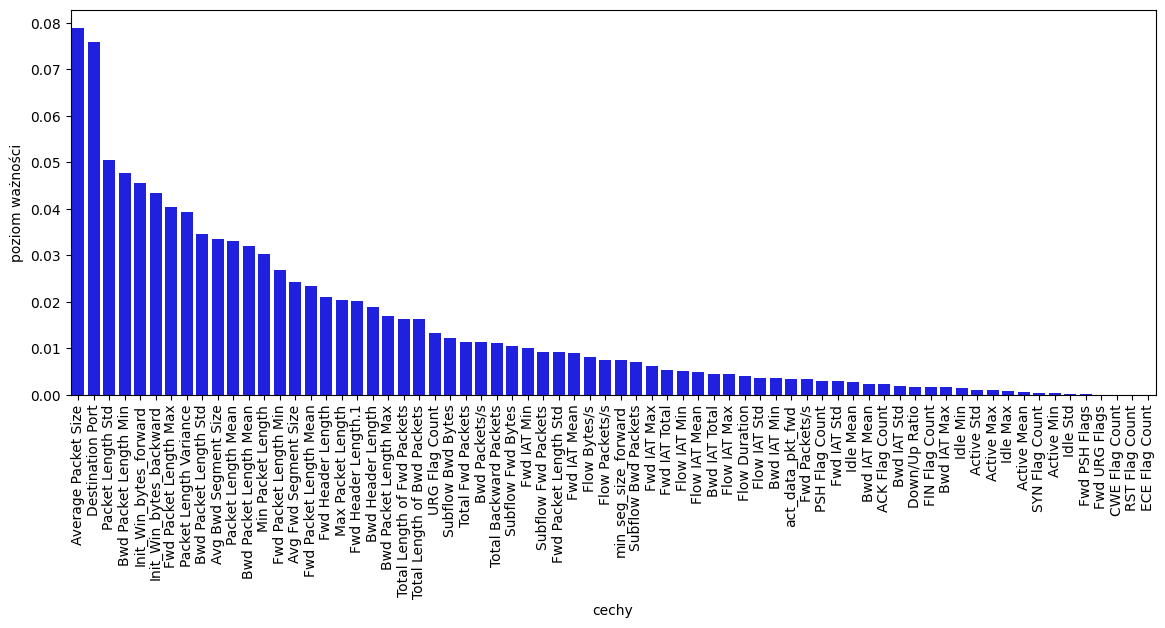

In [ ]:
score = np.round(clf.feature_importances_,5)
importances = pd.DataFrame({'Features':attrs.columns,'important':score})
importances = importances.sort_values('important',ascending=False).set_index('Features')

# plot importances
sns.barplot(x=importances.index, y="important", data=importances, color="b")
plt.xticks(rotation="vertical")
plt.gcf().set_size_inches(14,5)
plt.savefig("importances.png", dpi=200, format='png', bbox_inches = "tight", pad_inches=0.2)
plt.show()


In [ ]:
feature_importance = clf.feature_importances_

# Displaying feature importance
feature_importance_df = pd.DataFrame({'Feature': attrs.columns, 'Importance': feature_importance})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
print("\nFeature Importance:")
print(feature_importance_df)


Feature Importance:
                   Feature    Importance
50     Average Packet Size  7.891567e-02
0         Destination Port  7.580206e-02
39       Packet Length Std  5.045528e-02
11   Bwd Packet Length Min  4.770282e-02
58  Init_Win_bytes_forward  4.547229e-02
..                     ...           ...
30           Fwd PSH Flags  2.205328e-04
31           Fwd URG Flags  1.932255e-05
47          CWE Flag Count  5.980797e-06
43          RST Flag Count  1.562935e-07
48          ECE Flag Count  1.077390e-07

[70 rows x 2 columns]


In [ ]:
threshold = 0.001 # importance threshold

bl_thresh = importances.loc[importances["important"] < threshold]
print("there are {} features to delete, as they are below chosen threshold".format(bl_thresh.shape[0]))
print('-----------------------------------')
print("these features are the following:")
feats_to_del = [feat for feat in bl_thresh.index]
print("\n".join(feats_to_del))

## removing these not important features
data_downsampled.drop(columns=feats_to_del, inplace=True)

In [ ]:
data_downsampled

Destination Port  Flow Duration  Total Fwd Packets  \
2776738              53.0        49112.0                2.0   
2786746              53.0          167.0                2.0   
1961378             443.0       119826.0                1.0   
110356               53.0        50081.0                1.0   
743506              443.0    117591508.0               24.0   
...                   ...            ...                ...   
2829351            8080.0      1030558.0                3.0   
2829352            8080.0      1008819.0                3.0   
2829353            8080.0      1032755.0                3.0   
2829367            8080.0      1045087.0                3.0   
2829374            8080.0       997161.0                3.0   

         Total Backward Packets  Total Length of Fwd Packets  \
2776738                     2.0                         70.0   
2786746                     2.0                        138.0   
1961378                     1.0                          6.0   
110356                      1.0                         55.0   
743506                     20.0                        721.0   
...                         ...                          ...   
2829351                     3.0                          0.0   
2829352                     3.0                          0.0   
2829353                     3.0                          0.0   
2829367                     3.0                          0.0   
2829374                     3.0                          0.0   

         Total Length of Bwd Packets  Fwd Packet Length Max  \
2776738                        180.0                   35.0   
2786746                        238.0                   69.0   
1961378                          6.0                    6.0   
110356                          83.0                   55.0   
743506                        6734.0                  375.0   
...                              ...                    ...   
2829351                         18.0                    0.0   
2829352                         18.0                    0.0   
2829353                         18.0                    0.0   
2829367                         18.0                    0.0   
2829374                         18.0                    0.0   

         Fwd Packet Length Min  Fwd Packet Length Mean  Fwd Packet Length Std  \
2776738                   35.0               35.000000               0.000000   
2786746                   69.0               69.000000               0.000000   
1961378                    6.0                6.000000               0.000000   
110356                    55.0               55.000000               0.000000   
743506                     0.0               30.041667              86.356933   
...                        ...                     ...                    ...   
2829351                    0.0                0.000000               0.000000   
2829352                    0.0                0.000000               0.000000   
2829353                    0.0                0.000000               0.000000   
2829367                    0.0                0.000000               0.000000   
2829374                    0.0                0.000000               0.000000   

         Bwd Packet Length Max  Bwd Packet Length Min  Bwd Packet Length Mean  \
2776738                   90.0                   90.0                    90.0   
2786746                  119.0                  119.0                   119.0   
1961378                    6.0                    6.0                     6.0   
110356                    83.0                   83.0                    83.0   
743506                  1448.0                    0.0                   336.7   
...                        ...                    ...                     ...   
2829351                    6.0                    6.0                     6.0   
2829352                    6.0                    6.0                     6.0   
2829353                 

In [ ]:
all_data_corr_mtrx = data_downsampled.corr()

<ipython-input-58-b70e7092474d>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  all_data_corr_mtrx = data_downsampled.corr()


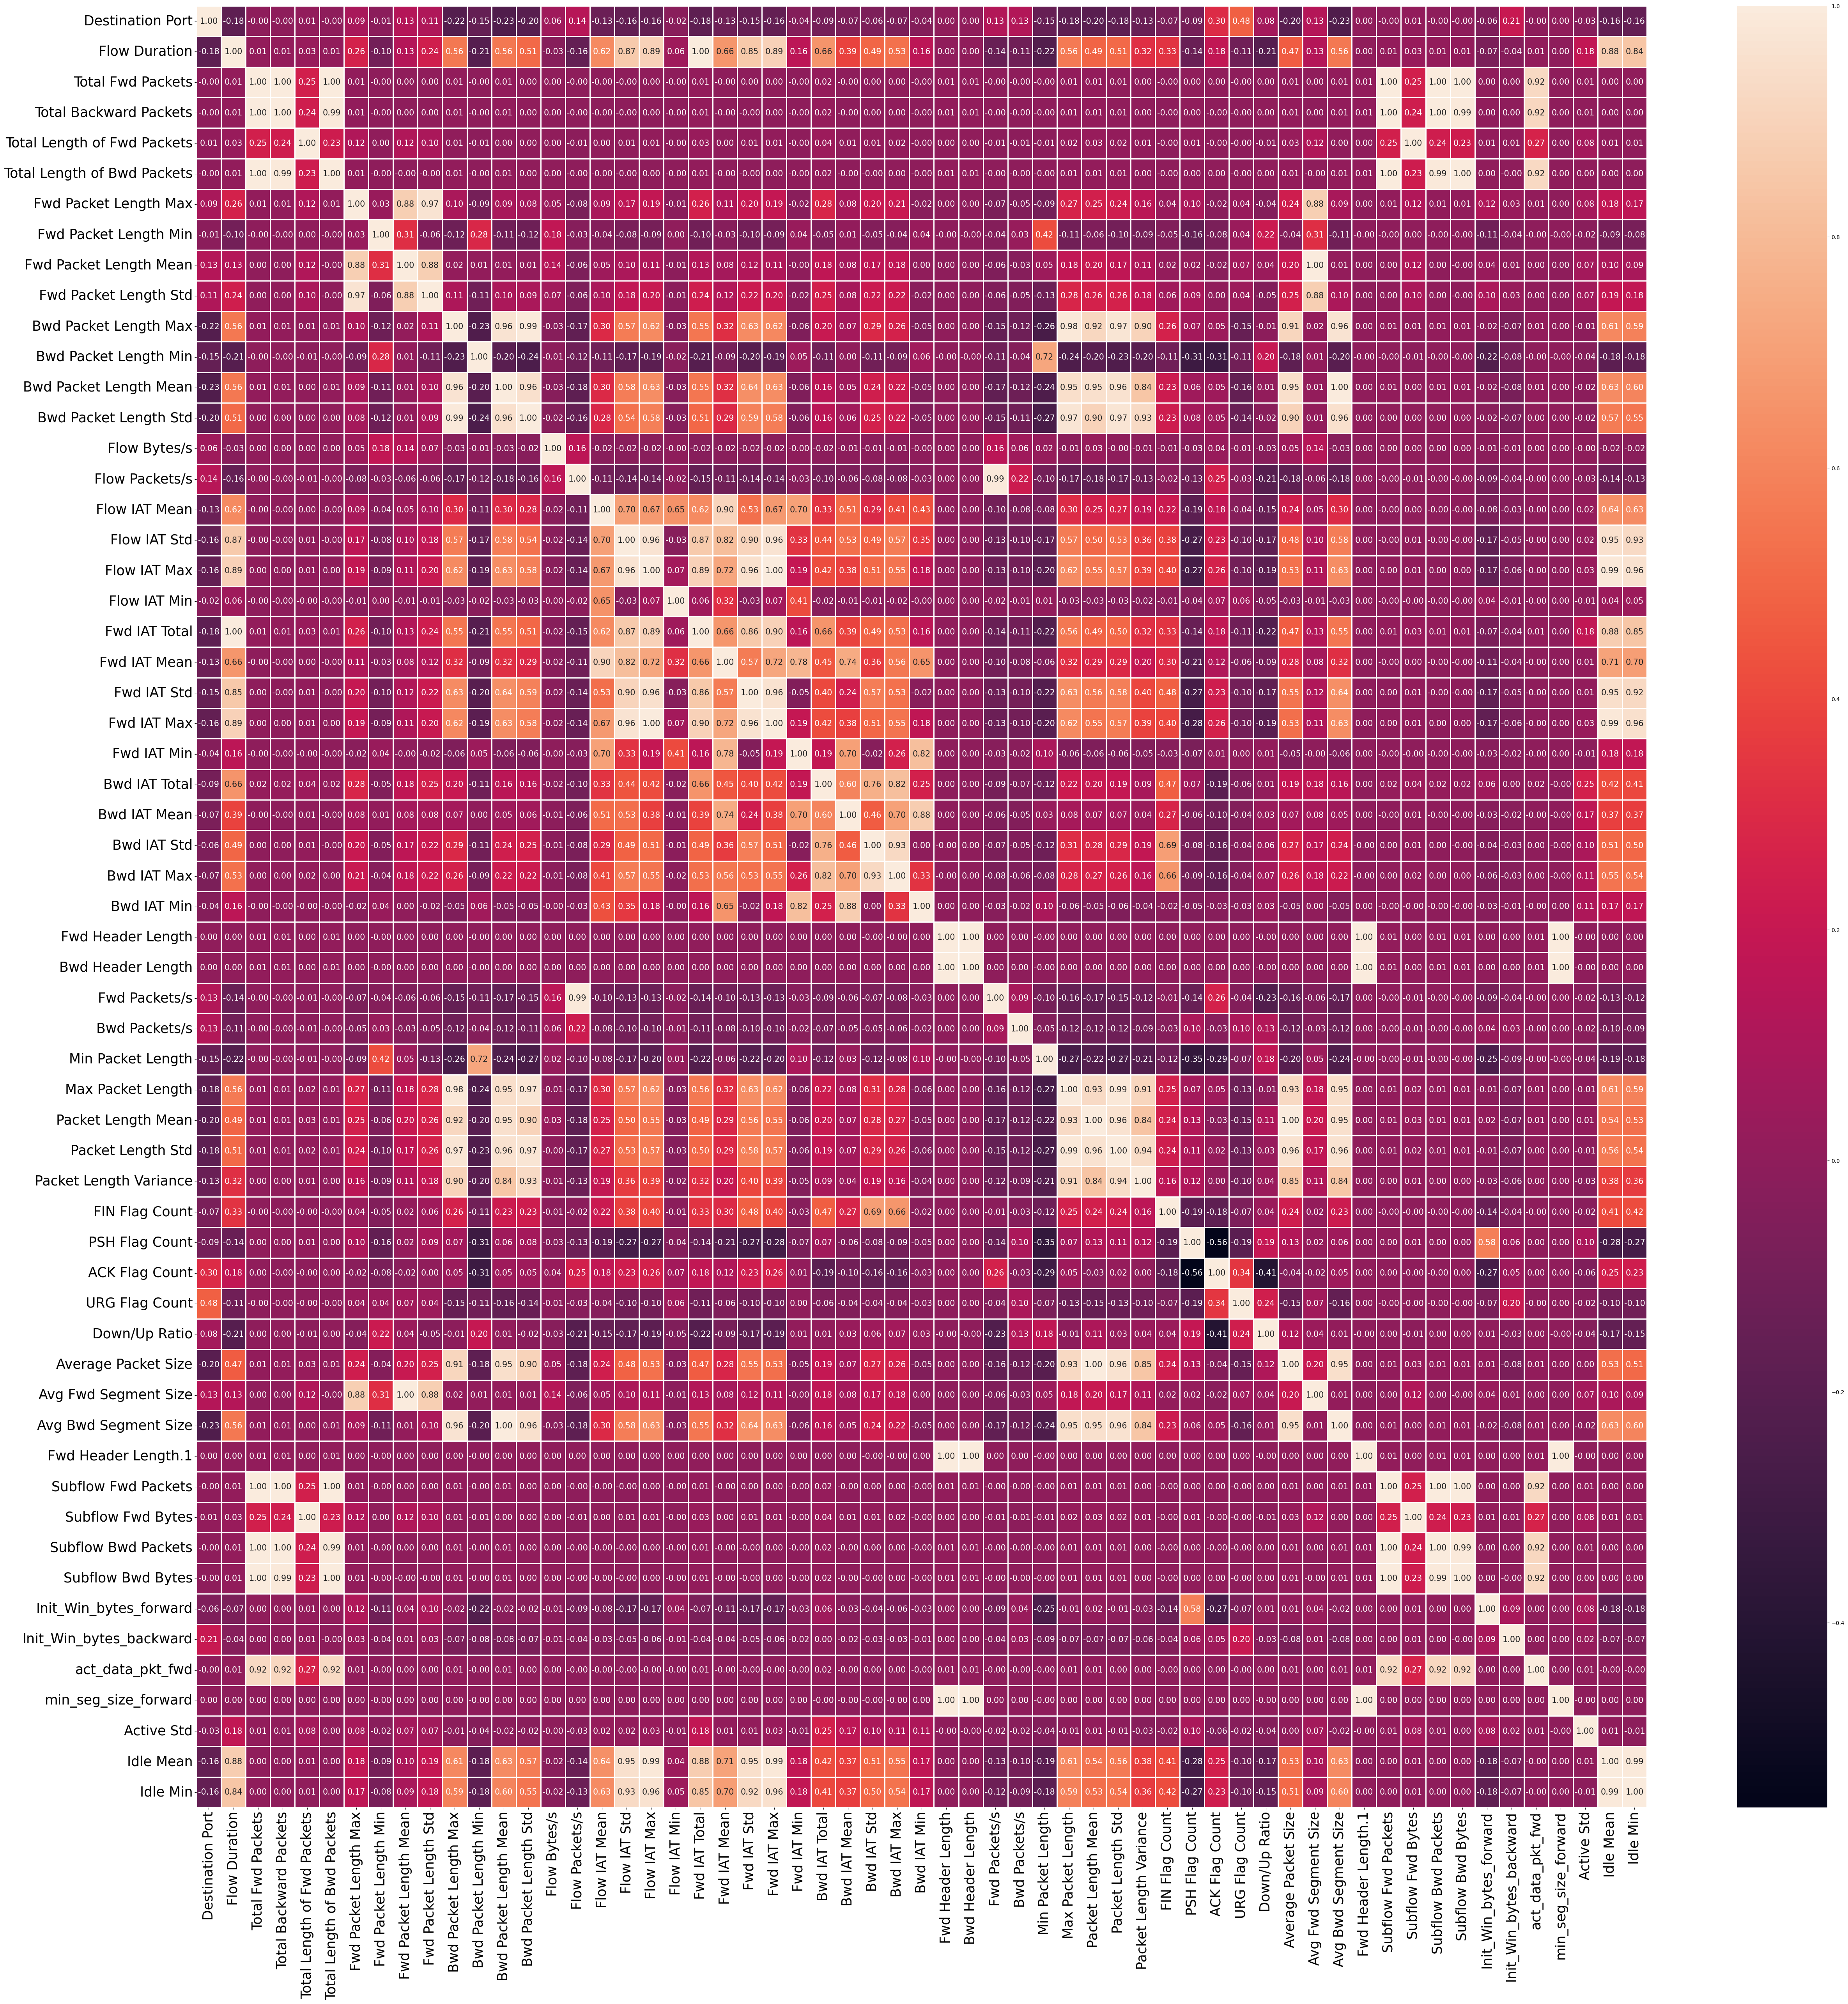

In [ ]:
## correlation heatmap

plt.gcf().set_size_inches(60, 60)
hm = sns.heatmap(all_data_corr_mtrx, annot=True, linewidths=.8, annot_kws={"fontsize": 15}, fmt=".2f")
hm.set_yticklabels(hm.get_ymajorticklabels(), fontsize = 25)
hm.set_xticklabels(hm.get_xmajorticklabels(), fontsize = 25)
plt.savefig("corr_heatmap.png", dpi=200, format='png', bbox_inches = "tight", pad_inches=0.4)
plt.show()

In [ ]:
def srt_corr(mtrx):
    corr_ustack = mtrx.unstack().abs()
    #corr_ustack
    corr_srted = corr_ustack.sort_values(ascending=False)
    return corr_srted
srt_corr(all_data_corr_mtrx)

Bwd Packet Length Mean  Avg Bwd Segment Size      1.000000
Avg Bwd Segment Size    Bwd Packet Length Mean    1.000000
Destination Port        Destination Port          1.000000
Fwd IAT Mean            Fwd IAT Mean              1.000000
Flow IAT Mean           Flow IAT Mean             1.000000
                                                    ...   
Subflow Bwd Packets     min_seg_size_forward      0.000011
min_seg_size_forward    Total Backward Packets    0.000011
Total Backward Packets  min_seg_size_forward      0.000011
act_data_pkt_fwd        min_seg_size_forward      0.000007
min_seg_size_forward    act_data_pkt_fwd          0.000007
Length: 3481, dtype: float64

In [ ]:
from collections import OrderedDict
thres_corr = 0.95
epoch=0
highly_corr = {"dummy": "dummy"}
feats_deled = []

all_data_corr_mtrx2 = all_data_corr_mtrx.copy()
def add_to_dct(l, ft, ft2):
    try:
        l[ft].append(ft2)
    except KeyError:
        l[ft] = [ft2]

get_imp = lambda feat: importances.loc[feat][0]
srt_key = lambda elem: get_imp(elem[0])

def what_to_del(dct_srt):
    to_del = []
    for k, val in dct_srt.items():

        feats_lw_imp = importances[importances.index.slice_indexer(k)].index
        if set(val) - set(feats_lw_imp):
            if k not in to_del: to_del.append(k)
        else:
            for ft in feats_lw_imp[::-1]:
                if ft in val and ft not in to_del:
                    to_del.append(ft)
                    break
    return to_del


while highly_corr:
    count = 0
    highly_corr.clear()
    for feats, val in srt_corr(all_data_corr_mtrx2).iteritems():
        if val > thres_corr and feats[0] != feats[1]:
            count += 1
            add_to_dct(highly_corr, feats[0], feats[1])
    if not highly_corr: break  # no more highly corr pairs
    highly_corr_srt = OrderedDict(sorted(highly_corr.items(), key=srt_key))  # sorted based on imp

    to_del = what_to_del(highly_corr_srt)
    feats_deled += to_del
    epoch +=1 # first epoch will be 1 not 0!
    print("there are {} higly correlated pairs in {} iteration".format(count, epoch))
    all_data_corr_mtrx2.drop(to_del, axis=1, inplace=True)
    all_data_corr_mtrx2.drop(to_del, axis=0, inplace=True)  # need to remove the feat from both cols and index


In [ ]:
print("deleting: {} feature".format(len(feats_deled)))
print("finally deleted:\n",feats_deled)

deleting: 25 feature
finally deleted:
 ['Idle Min', 'Idle Mean', 'Fwd IAT Std', 'Fwd Packets/s', 'Flow IAT Std', 'Flow Duration', 'Flow IAT Max', 'Subflow Bwd Packets', 'min_seg_size_forward', 'Fwd Packet Length Std', 'Subflow Fwd Packets', 'Subflow Fwd Bytes', 'Total Backward Packets', 'Total Fwd Packets', 'Subflow Bwd Bytes', 'Bwd Packet Length Max', 'Bwd Header Length', 'Fwd Header Length.1', 'Max Packet Length', 'Fwd Packet Length Mean', 'Bwd Packet Length Mean', 'Packet Length Mean', 'Avg Bwd Segment Size', 'Bwd Packet Length Std', 'Packet Length Std']


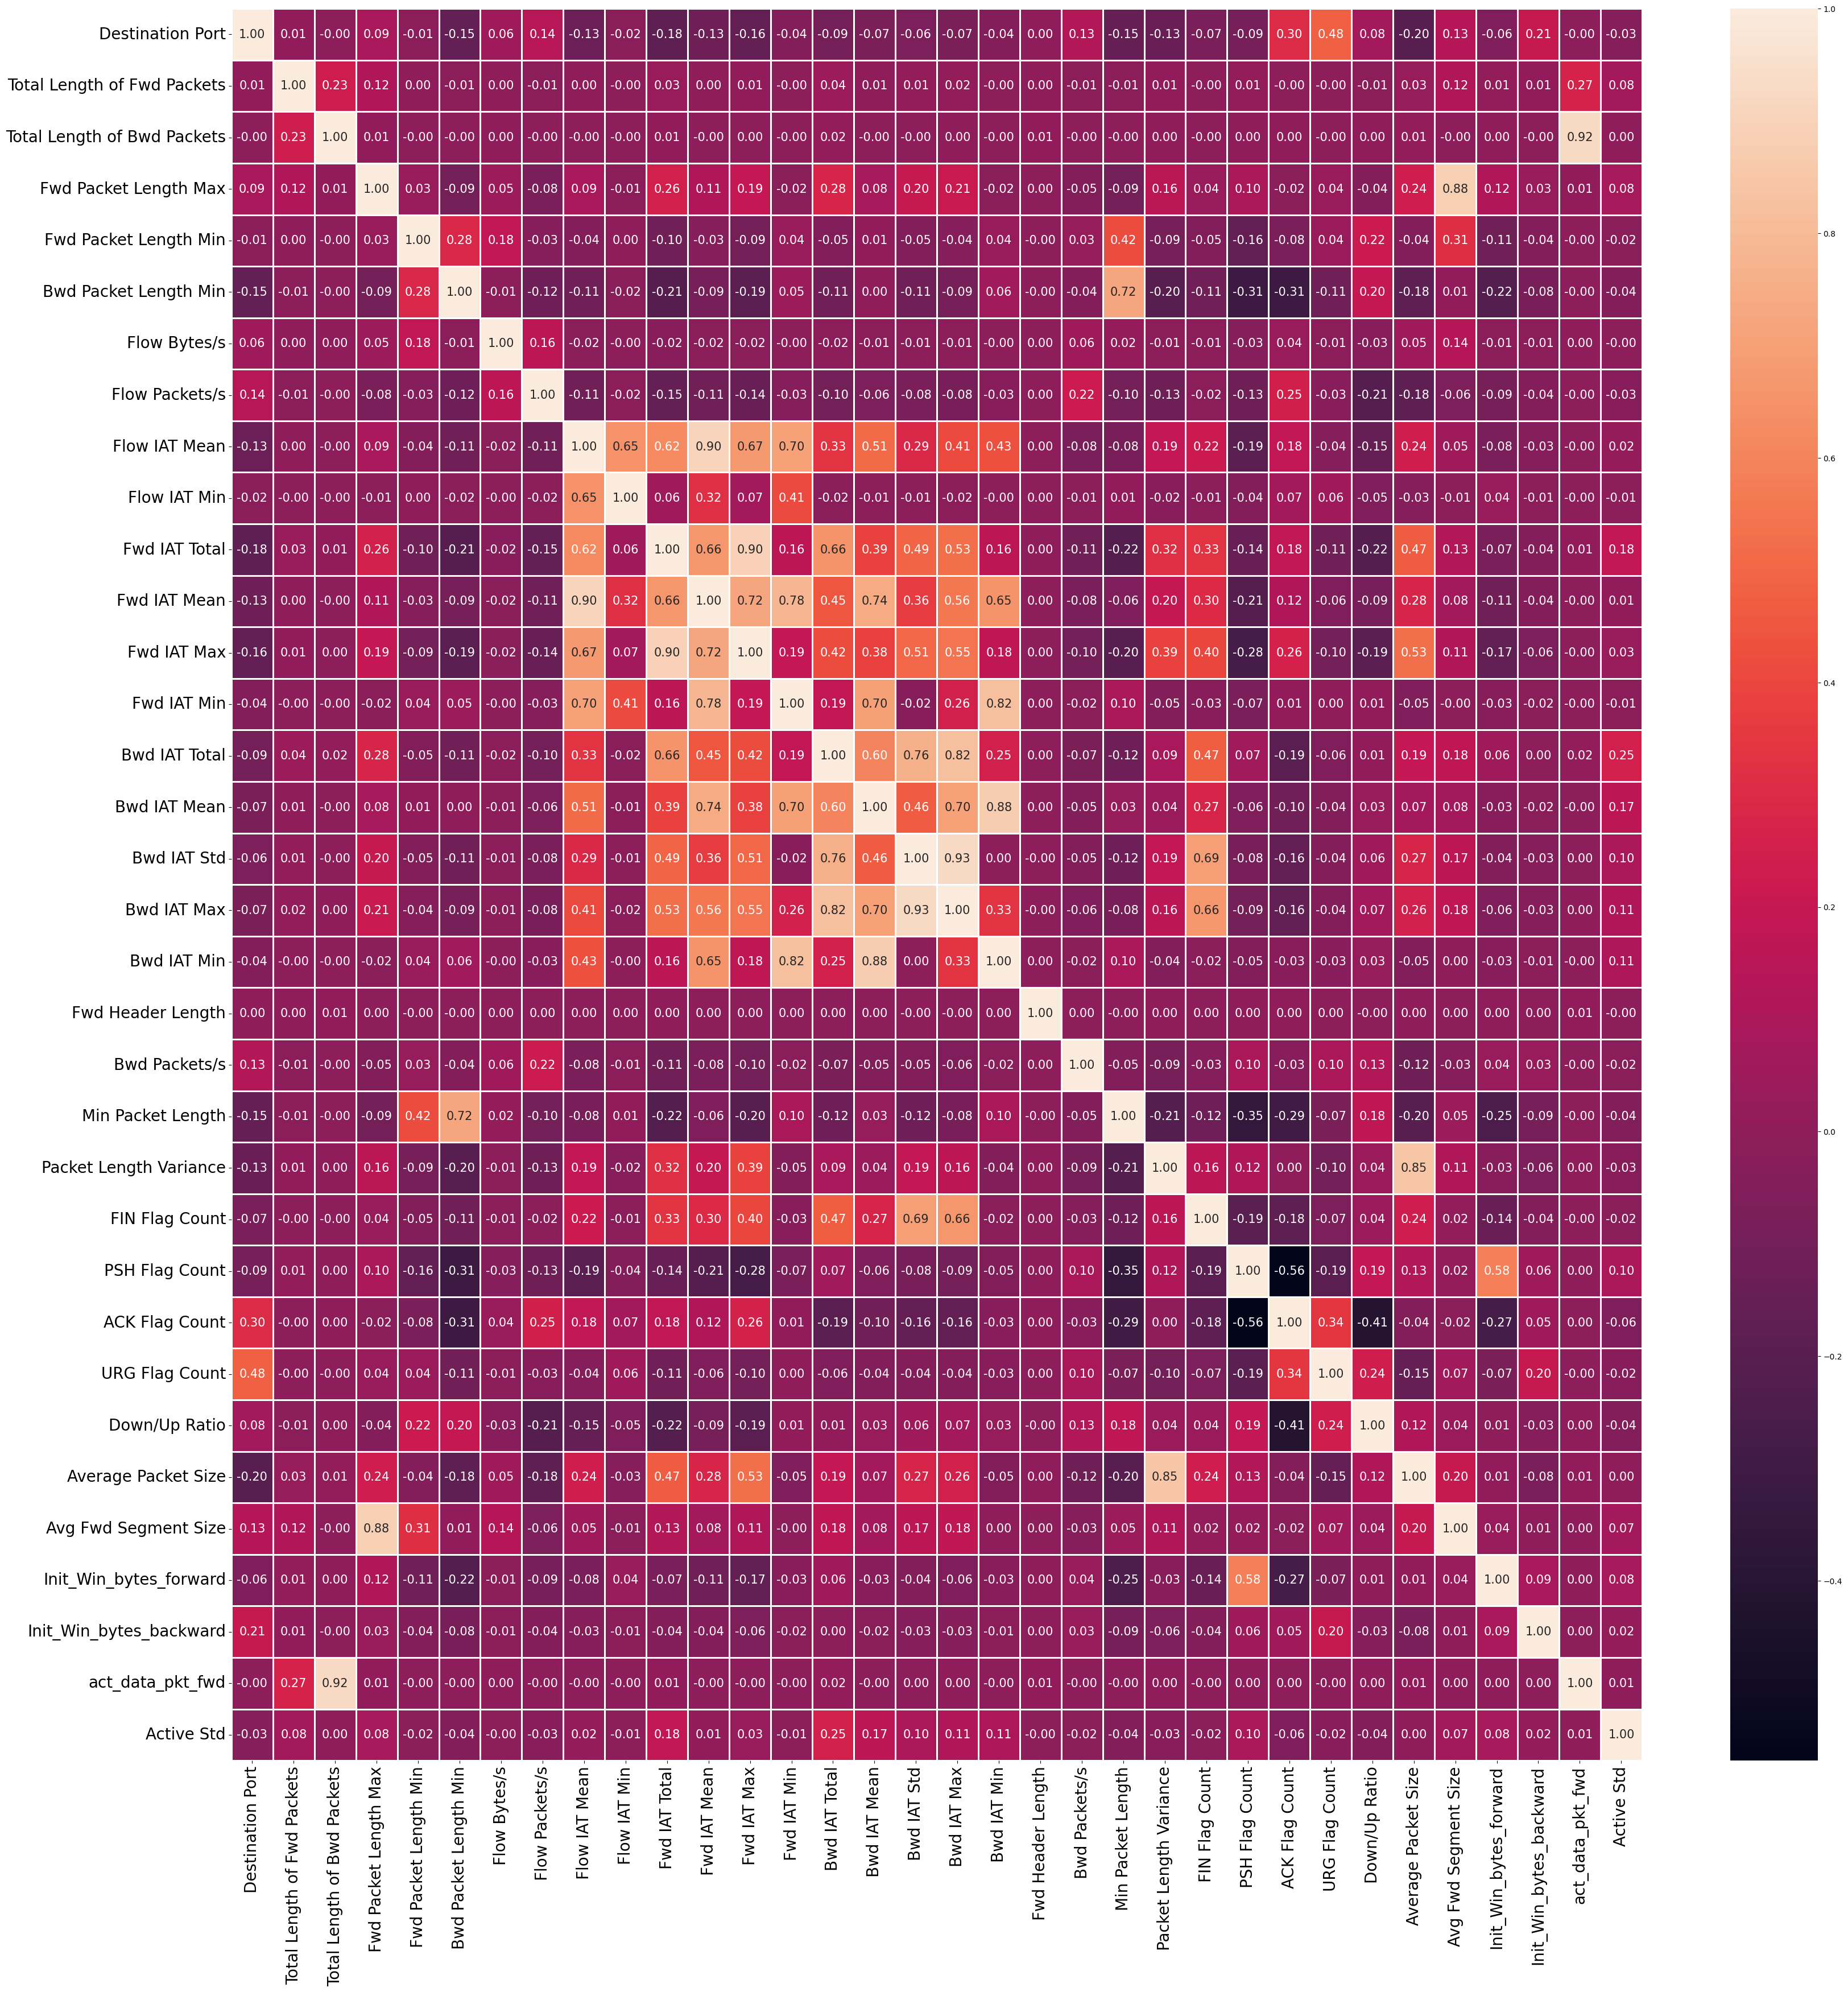

In [ ]:
plt.gcf().set_size_inches(40, 40)
hm2 = sns.heatmap(all_data_corr_mtrx2, annot=True, linewidths=.8, annot_kws={"fontsize": 15}, fmt=".2f")
hm2.set_yticklabels(hm.get_ymajorticklabels(), fontsize = 20)
hm2.set_xticklabels(hm.get_xmajorticklabels(), fontsize = 20)
plt.savefig("corr_heatmap2.png", dpi=200, format='png', bbox_inches = "tight", pad_inches=0.4)
plt.show()

In [ ]:
all_datav3 = data_downsampled.copy()

all_datav3.drop(feats_deled, axis=1, inplace=True)
all_datav3.to_csv('Processed_file.csv')

all_datav3

Destination Port  Total Length of Fwd Packets  \
0                      53                           70   
1                      53                          138   
2                     443                            6   
3                      53                           55   
4                     443                          721   
...                   ...                          ...   
1113107              8080                            0   
1113108              8080                            0   
1113109              8080                            0   
1113110              8080                            0   
1113111              8080                            0   

         Total Length of Bwd Packets  Fwd Packet Length Max  \
0                                180                     35   
1                                238                     69   
2                                  6                      6   
3                                 83                     55   
4                               6734                    375   
...                              ...                    ...   
1113107                           18                      0   
1113108                           18                      0   
1113109                           18                      0   
1113110                           18                      0   
1113111                           18                      0   

         Fwd Packet Length Min  Bwd Packet Length Min  Flow Bytes/s  \
0                           35                     90  5.090406e+03   
1                           69                    119  2.251497e+06   
2                            6                      6  1.001452e+02   
3                           55                     83  2.755536e+03   
4                            0                      0  6.339744e+01   
...                        ...                    ...           ...   
1113107                      0                      6  1.746627e+01   
1113108                      0                      6  1.784265e+01   
1113109                      0                      6  1.742911e+01   
1113110                      0                      6  1.722345e+01   
1113111                      0                      6  1.805125e+01   

         Flow Packets/s  Flow IAT Mean  Flow IAT Min  ...  URG Flag Count  \
0             81.446490   1.637067e+04             4  ...               0   
1          23952.095810   5.566667e+01             0  ...               0   
2             16.690868   1.198260e+05        119826  ...               1   
3             39.935305   5.008100e+04         50081  ...               0   
4              0.374177   2.734686e+06             6  ...               0   
...                 ...            ...           ...  ...             ...   
1113107        5.822089   2.061116e+05           498  ...               0   
1113108        5.947549   2.017638e+05           408  ...               0   
1113109        5.809703   2.065510e+05           616  ...               0   
1113110        5.741149   2.090174e+05           481  ...               0   
1113111        6.017082   1.994322e+05           499  ...               0   

         Down/Up Ratio  Average Packet Size  Avg Fwd Segment Size  \
0                    1            71.250000             35.000000   
1                    1           111.250000             69.000000   
2                    1             9.000000              6.000000   
3                    1            96.500000             55.000000   
4                    0           169.431818             30.041667   
...                ...                  ...                   ...   
1113107              1             3.000000              0.000000   
1113108              1             3.000000              0.000000   
1113109              1             3.000000              0.000000   
1113110              1             3.000000              0.000000   
1113111           

In [ ]:
all_datav3.columns

Index(['Destination Port', 'Flow Duration', 'Total Length of Fwd Packets',
       'Total Length of Bwd Packets', 'Fwd Packet Length Max',
       'Fwd Packet Length Min', 'Bwd Packet Length Min', 'Flow Bytes/s',
       'Flow IAT Mean', 'Flow IAT Min', 'Fwd IAT Mean', 'Fwd IAT Min',
       'Bwd IAT Total', 'Bwd IAT Mean', 'Bwd IAT Std', 'Bwd IAT Max',
       'Bwd IAT Min', 'Bwd Header Length', 'Fwd Packets/s', 'Bwd Packets/s',
       'Min Packet Length', 'Packet Length Variance', 'FIN Flag Count',
       'PSH Flag Count', 'ACK Flag Count', 'URG Flag Count', 'Down/Up Ratio',
       'Average Packet Size', 'Avg Fwd Segment Size', 'Init_Win_bytes_forward',
       'Init_Win_bytes_backward', 'act_data_pkt_fwd', 'Active Max', 'Idle Max',
       'Label', 'traffic type'],
      dtype='object')

<Axes: ylabel='Type'>

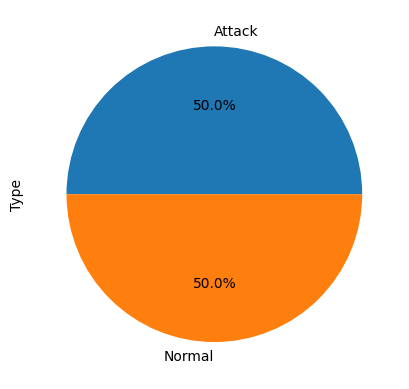

In [ ]:
all_datav3.groupby('traffic type').size().plot(kind='pie',
                                       y = "traffic type",
                                       label = "Type",
                                       autopct='%1.1f%%')

In [ ]:
# df1 = all_datav3[all_datav3["traffic type"] == "Normal"][:556367]
# df2 = all_datav3[all_datav3["traffic type"] == "Attack"][:556367]
# df_equal = pd.concat([ df1,df2], axis =0)

In [ ]:
# df_equal.replace(to_replace="Normal", value=0, inplace=True)
# df_equal.replace(to_replace="Attack", value=1, inplace=True)
# df_equal.drop(['Label'], axis=1, inplace=True)

# del all_data_corr_mtrx, all_data_corr_mtrx2, df1, df2, all_datav3, all_datav3_cp

In [ ]:
!gdown 1z32440cv37nNHWqb635NglPj_ENR5O4-
!unzip Processed_file.zip
!rm -r Processed_file.zip

Downloading...
From: https://drive.google.com/uc?id=1X0s98BBYxXog5ZvtYtyts_jggvN7eDYq
To: /content/Processed_file.zip
100% 56.5M/56.5M [00:01<00:00, 33.8MB/s]
Archive:  Processed_file.zip
  inflating: Processed file.csv      


In [ ]:
df_equal = pd.read_csv('Processed_file.csv').iloc[:, 1:].drop(['Label'], axis=1)
df_equal.head()

Destination Port  Total Length of Fwd Packets  Total Length of Bwd Packets  \
0                53                           70                          180   
1                53                          138                          238   
2               443                            6                            6   
3                53                           55                           83   
4               443                          721                         6734   

   Fwd Packet Length Max  Fwd Packet Length Min  Bwd Packet Length Min  \
0                     35                     35                     90   
1                     69                     69                    119   
2                      6                      6                      6   
3                     55                     55                     83   
4                    375                      0                      0   

   Flow Bytes/s  Flow Packets/s  Flow IAT Mean  Flow IAT Min  ...  \
0  5.090406e+03       81.446490   1.637067e+04             4  ...   
1  2.251497e+06    23952.095810   5.566667e+01             0  ...   
2  1.001452e+02       16.690868   1.198260e+05        119826  ...   
3  2.755536e+03       39.935305   5.008100e+04         50081  ...   
4  6.339744e+01        0.374177   2.734686e+06             6  ...   

   ACK Flag Count  URG Flag Count  Down/Up Ratio  Average Packet Size  \
0               0               0              1            71.250000   
1               0               0              1           111.250000   
2               1               1              1             9.000000   
3               0               0              1            96.500000   
4               0               0              0           169.431818   

   Avg Fwd Segment Size  Init_Win_bytes_forward  Init_Win_bytes_backward  \
0             35.000000                      -1                       -1   
1             69.000000                      -1                       -1   
2              6.000000                     458                       71   
3             55.000000                      -1                       -1   
4             30.041667                   29200                      972   

   act_data_pkt_fwd   Active Std  traffic type  
0                 1       0.0000        Normal  
1                 1       0.0000        Normal  
2                 0       0.0000        Normal  
3                 0       0.0000        Normal  
4                 4  622461.5569        Normal  

[5 rows x 35 columns]

In [ ]:
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler(random_state=10)

# lb_type = df_equal.loc[:, "Label"] #already dropped
trf_type = df_equal.loc[:, "traffic type"]
df_equal.drop(["traffic type"], axis=1, inplace=True) ## drop categorical columns

data_scaled = scaler.fit_transform(df_equal)

all_data_scaled = pd.DataFrame(data_scaled, columns=df_equal.columns)

df_equal = pd.concat([all_data_scaled, trf_type], axis=1)

In [ ]:
from sklearn.model_selection import train_test_split

X = df_equal.drop(['traffic type'], axis=1)  # Features
y = df_equal['traffic type']  # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

In [ ]:
X_train.head()

Destination Port  Total Length of Fwd Packets  \
207971                 53                           80   
704393                 80                          382   
268128                 53                           79   
444683                 53                          102   
1056615              1059                            0   

         Total Length of Bwd Packets  Fwd Packet Length Max  \
207971                           112                     40   
704393                         11595                    370   
268128                           207                     79   
444683                           224                     51   
1056615                            6                      0   

         Fwd Packet Length Min  Bwd Packet Length Min  Flow Bytes/s  \
207971                      40                     56  7.901235e+05   
704393                       0                      0  1.216409e+02   
268128                      79                    207  7.096774e+05   
444683                      51                    112  1.646465e+06   
1056615                      0                      6  1.363636e+05   

         Flow Packets/s  Flow IAT Mean  Flow IAT Min  ...  PSH Flag Count  \
207971     16460.905350          81.00             3  ...               0   
704393         0.132031     8205160.25            48  ...               0   
268128      4962.779156         403.00           403  ...               0   
444683     20202.020202          66.00             3  ...               0   
1056615    45454.545450          44.00            44  ...               1   

         ACK Flag Count  URG Flag Count  Down/Up Ratio  Average Packet Size  \
207971                0               0              1            58.000000   
704393                0               0              1           921.769231   
268128                0               0              1           182.500000   
444683                0               0              1            94.250000   
1056615               0               0              1             3.000000   

         Avg Fwd Segment Size  Init_Win_bytes_forward  \
207971                   40.0                      -1   
704393                   76.4                       0   
268128                   79.0                      -1   
444683                   51.0                      -1   
1056615                   0.0                   29200   

         Init_Win_bytes_backward  act_data_pkt_fwd  Active Std  
207971                        -1                 1         0.0  
704393                       235                 2         0.0  
268128                        -1                 0         0.0  
444683                        -1                 1         0.0  
1056615                        0                 0         0.0  

[5 rows x 34 columns]

In [ ]:
X_test.head()

Destination Port  Total Length of Fwd Packets  \
689951                80                          363   
535390                53                           46   
727956                80                          351   
739700                80                          292   
885070                80                           30   

        Total Length of Bwd Packets  Fwd Packet Length Max  \
689951                        11595                    339   
535390                           62                     46   
727956                        11595                    351   
739700                        11595                    292   
885070                            0                      6   

        Fwd Packet Length Min  Bwd Packet Length Min  Flow Bytes/s  \
689951                      0                      0    140.096245   
535390                     46                     62   4599.267524   
727956                      0                      0    139.414231   
739700                      0                      0    120.440695   
885070                      6                      0      2.780726   

        Flow Packets/s  Flow IAT Mean  Flow IAT Min  ...  PSH Flag Count  \
689951        0.140588    7759600.636             1  ...               0   
535390       85.171621      23482.000         23482  ...               0   
727956        0.163385    6591314.769             0  ...               0   
739700        0.151982    7049705.500             0  ...               0   
885070        0.463454    2697137.500           215  ...               0   

        ACK Flag Count  URG Flag Count  Down/Up Ratio  Average Packet Size  \
689951               0               0              0           997.000000   
535390               0               0              1            77.000000   
727956               1               0              0           853.285714   
739700               1               0              0           792.466667   
885070               1               0              0             7.200000   

        Avg Fwd Segment Size  Init_Win_bytes_forward  Init_Win_bytes_backward  \
689951             51.857143                       0                      235   
535390             46.000000                      -1                       -1   
727956             43.875000                     274                      235   
739700             36.500000                     251                      235   
885070              6.000000                     256                       -1   

        act_data_pkt_fwd  Active Std  
689951                 4         0.0  
535390                 0         0.0  
727956                 1         0.0  
739700                 1         0.0  
885070                 4         0.0  

[5 rows x 34 columns]

In [ ]:
from sklearn import metrics
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis as QDA
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.metrics import average_precision_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score, classification_report


import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
import os
import pandas as pd
import csv
import time
import warnings
import math
warnings.filterwarnings("ignore")

In [ ]:
ml_list={
"Naive Bayes":GaussianNB(),
"QDA":QDA(),
"Random Forest":RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
"ID3" :DecisionTreeClassifier(max_depth=5,criterion="entropy"),
"AdaBoost":AdaBoostClassifier(),
"MLP":MLPClassifier(hidden_layer_sizes=(13,13,13),max_iter=500),
"Nearest Neighbors":KNeighborsClassifier(3)}

repetition=10

print ('%-17s %-17s  %-15s %-15s %-15s %-15s %-15s' % ("Loop","ML algorithm","accuracy","Precision", "Recall" , "F1-score","Time"))# print output header

for ii in ml_list: #this loop runs on the list containing the machine learning algorithm names. Operations are repeated for all the 7 algorithm
    precision=[]
    recall=[]
    f1=[]
    accuracy=[]
    t_time=[]
    for i in range(repetition): # This loop allows cross-validation and machine learning algorithm to be repeated 10 times
        start=time.time()#time stamp for processing time

        # cross-validation
        X_train, X_test, y_train, y_test = train_test_split(X, y,#  data (X) and labels (y) are divided into 2 parts to be sent to the machine learning algorithm (80% train,%20 test).
            test_size = 0.20, random_state = repetition)#  So, in total there are 4 tracks: training data(X_train), training tag (y_train), test data(X_test) and test tag(y_test).


        #machine learning algorithm is applied in this section
        clf = ml_list[ii]
        clf.fit(X_train, y_train)
        predict = clf.predict(X_test)

        #makes "classification report" and assigns the precision, f-measure, and recall values.s.

        f_1=f1_score(y_test, predict, average='macro')
        pr=precision_score(y_test, predict, average='macro')
        rc=recall_score(y_test, predict, average='macro')

        precision.append(float(pr))
        recall.append(float(rc))
        f1.append(float(f_1))
        accuracy.append(clf.score(X_test, y_test))

        end = time.time()
        t_time.append(float((end- start)))

        print('%-17s %-17s  %-15s %-15s %-15s %-15s %-15s' % (i+1,ii,str(round(np.mean(accuracy),2)),str(round(np.mean(precision),2)),
              str(round(np.mean(recall),2)),str(round(np.mean(f1),2)),str(round(np.mean(t_time),4))))
    print()

Loop              ML algorithm       accuracy        Precision       Recall          F1-score        Time           
1                 Naive Bayes        0.58            0.7             0.58            0.51            1.742          
2                 Naive Bayes        0.58            0.7             0.58            0.51            1.9785         
3                 Naive Bayes        0.58            0.7             0.58            0.51            1.896          
4                 Naive Bayes        0.58            0.7             0.58            0.51            1.8541         
5                 Naive Bayes        0.58            0.7             0.58            0.51            1.8223         
6                 Naive Bayes        0.58            0.7             0.58            0.51            1.8012         
7                 Naive Bayes        0.58            0.7             0.58            0.51            1.7873         
8                 Naive Bayes        0.58            0.7        